In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load item.csv

df1 = pd.read_csv('/Users/rumethsandinu/Study/Assessments/Year 2/DSGP/Datasets/annex/item.csv')
df1.head()

,Item Code,Item Name,Category Code,Category Name
0,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables
1,102900005115199,Sichuan Red Cedar,1011010101,Flower/Leaf Vegetables
2,102900005115625,Local Xiaomao Cabbage,1011010101,Flower/Leaf Vegetables
3,102900005115748,White Caitai,1011010101,Flower/Leaf Vegetables
4,102900005115762,Amaranth,1011010101,Flower/Leaf Vegetables


In [3]:
df1.shape

(251, 4)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Item Code      251 non-null    int64 
 1   Item Name      251 non-null    object
 2   Category Code  251 non-null    int64 
 3   Category Name  251 non-null    object
dtypes: int64(2), object(2)
memory usage: 8.0+ KB


In [5]:
# change the Item Code data type to string

df1['Item Code'] = df1['Item Code'].astype(str)

In [6]:
# check if there is any null values in the table

df1.isnull().sum()

Item Code        0
Item Name        0
Category Code    0
Category Name    0
dtype: int64

In [7]:
# check the frequency of each catgory name

df1['Category Name'].value_counts()

Category Name
Flower/Leaf Vegetables         100
Edible Mushroom                 72
Capsicum                        45
Aquatic Tuberous Vegetables     19
Solanum                         10
Cabbage                          5
Name: count, dtype: int64

In [8]:
def rename_category(data):
    if data == 'Flower/Leaf Vegetables':
        return 'Flower'
    return data

# rename all Flower/Leaf Vegetables values to  Flower using rename_category function

df1['Category Name'] = df1['Category Name'].apply(rename_category)
df1['Category Name'].value_counts()

Category Name
Flower                         100
Edible Mushroom                 72
Capsicum                        45
Aquatic Tuberous Vegetables     19
Solanum                         10
Cabbage                          5
Name: count, dtype: int64

In [9]:
# load the sale.csv dataset

df3 = pd.read_csv('/Users/rumethsandinu/Study/Assessments/Year 2/DSGP/Datasets/annex/sale.csv')
df3.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,No


In [10]:
df3 = df3.drop(columns=['Date', 'Time'], axis=1)

{'whiskers': [<matplotlib.lines.Line2D at 0x16b9639d0>,
 'caps': [<matplotlib.lines.Line2D at 0x16b963f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x16b963730>],
 'medians': [<matplotlib.lines.Line2D at 0x16b980490>],
 'fliers': [<matplotlib.lines.Line2D at 0x16b980730>],
 'means': []}

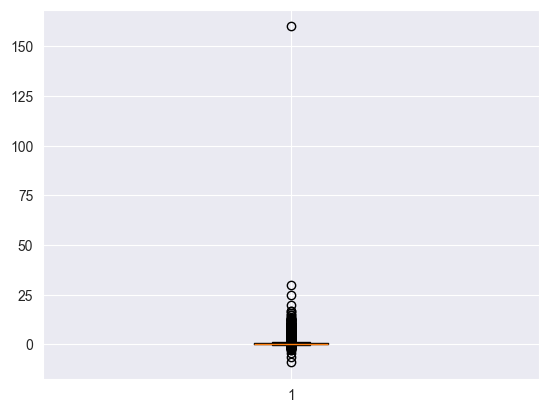

In [11]:
plt.boxplot(df3['Quantity Sold (kilo)'])

In [12]:
# check all the Quantity Sold (kilo) values are positive integers

(df3['Quantity Sold (kilo)'] < 0).sum() == (df3['Sale or Return'] == 'return').sum()

True

In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878503 entries, 0 to 878502
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Item Code                    878503 non-null  int64  
 1   Quantity Sold (kilo)         878503 non-null  float64
 2   Unit Selling Price (RMB/kg)  878503 non-null  float64
 3   Sale or Return               878503 non-null  object 
 4   Discount (Yes/No)            878503 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.5+ MB


In [14]:
df3.shape

(878503, 5)

In [15]:
# check if there are any null values in the table

df3.isnull().sum()

Item Code                      0
Quantity Sold (kilo)           0
Unit Selling Price (RMB/kg)    0
Sale or Return                 0
Discount (Yes/No)              0
dtype: int64

In [16]:
df3['Item Code'].value_counts()

Item Code
102900011016701    69945
102900005116714    58905
102900005116530    47509
102900005115779    39887
102900005116899    39285
                   ...  
102900051000890        1
102900011023075        1
102900011009772        1
102900011031858        1
106973223300667        1
Name: count, Length: 246, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x16ba83640>,
 'caps': [<matplotlib.lines.Line2D at 0x16ba83b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x16ba833a0>],
 'medians': [<matplotlib.lines.Line2D at 0x16ba94100>],
 'fliers': [<matplotlib.lines.Line2D at 0x16ba943a0>],
 'means': []}

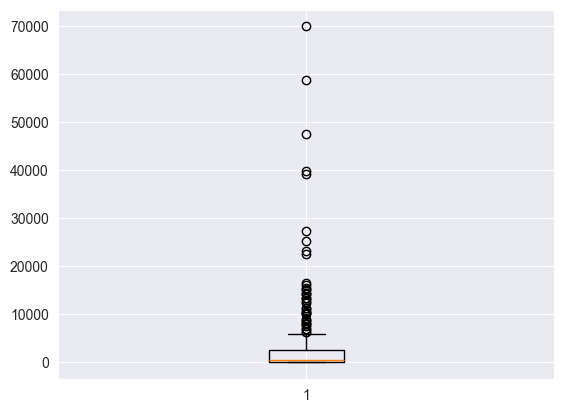

In [17]:
plt.boxplot(df3['Item Code'].value_counts())

In [18]:
data = {'present': [False] * df3['Item Code'].unique().shape[0]}
present = pd.DataFrame(data)

# check if all the df3 Item Code data available in df1

for i in range(df3['Item Code'].unique().shape[0]):
    for j in range(df1['Item Code'].shape[0]):
        if df3['Item Code'].values[i] == int(df1['Item Code'].values[j]):
            present.at[i, 'present'] = True
            break
                 
present['present'].value_counts()

present
True    246
Name: count, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x16bc11e20>,
 'caps': [<matplotlib.lines.Line2D at 0x16bc233a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16baa9040>],
 'medians': [<matplotlib.lines.Line2D at 0x16bc238e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16bc23b80>],
 'means': []}

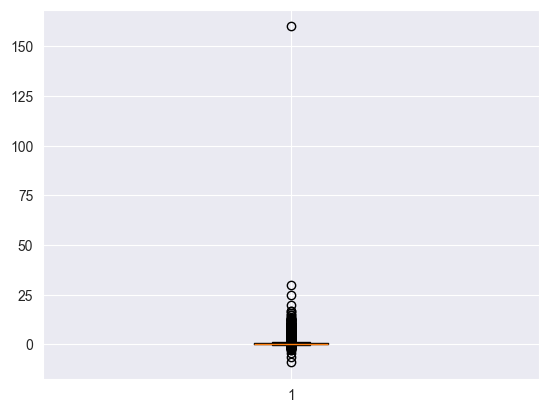

In [19]:
plt.boxplot(df3['Quantity Sold (kilo)'])

In [20]:
# check all the return values defined correctly in the Quantity Sold (kilo) column as negative values

((df3['Quantity Sold (kilo)'] < 0).sum()) == ((df3['Sale or Return'] == 'return').sum())

True

{'whiskers': [<matplotlib.lines.Line2D at 0x16bc5deb0>,
 'caps': [<matplotlib.lines.Line2D at 0x16bc6e430>,
 'boxes': [<matplotlib.lines.Line2D at 0x16bc4e7c0>],
 'medians': [<matplotlib.lines.Line2D at 0x16bc6e970>],
 'fliers': [<matplotlib.lines.Line2D at 0x16bc6ec10>],
 'means': []}

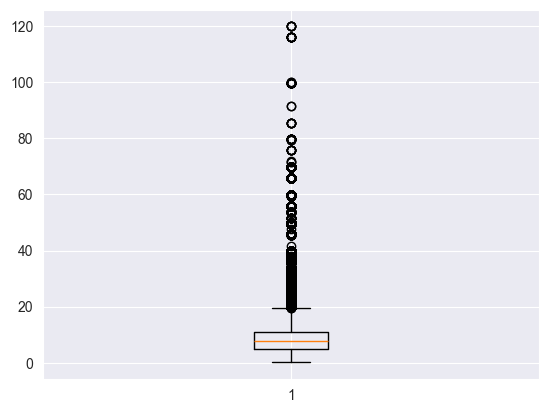

In [21]:
plt.boxplot(df3['Unit Selling Price (RMB/kg)'])

In [22]:
df3.head()

,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
0,102900005117056,0.396,7.6,sale,No
1,102900005115960,0.849,3.2,sale,No
2,102900005117056,0.409,7.6,sale,No
3,102900005115823,0.421,10.0,sale,No
4,102900005115908,0.539,8.0,sale,No


In [23]:
# getting a copy of df3 and asigning it to dff

dff = df3.copy()

# chaning value tipes to string in Item Code, Quantity Sold (kilo) and Unit Selling Price (RMB/kg)

dff['Item Code'] = dff['Item Code'].astype(str)
dff['Quantity Sold (kilo)'] = dff['Quantity Sold (kilo)'].astype(str)
dff['Unit Selling Price (RMB/kg)'] = dff['Unit Selling Price (RMB/kg)'].astype(str)
dff.sample(5)

,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
164538,102900005117056,0.241,10.0,sale,No
632694,102900051000944,0.324,29.6,sale,No
422460,102900005115779,0.234,8.0,sale,Yes
94943,102900005116790,0.84,8.0,sale,No
506547,102900005116219,0.424,19.8,sale,No


In [24]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878503 entries, 0 to 878502
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Item Code                    878503 non-null  object
 1   Quantity Sold (kilo)         878503 non-null  object
 2   Unit Selling Price (RMB/kg)  878503 non-null  object
 3   Sale or Return               878503 non-null  object
 4   Discount (Yes/No)            878503 non-null  object
dtypes: object(5)
memory usage: 33.5+ MB


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Item Code      251 non-null    object
 1   Item Name      251 non-null    object
 2   Category Code  251 non-null    int64 
 3   Category Name  251 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.0+ KB


In [26]:
dff.shape

(878503, 5)

In [27]:
# select the item code from df1 respective to dff item code and extracting its data

for i in range(dff.shape[0]):
    for j in range(df1.shape[0]):
        if dff['Item Code'].values[i] == df1['Item Code'].values[j]:
            dff.at[i, 'Item Name'] = df1['Item Name'].values[j]
            dff.at[i, 'Category Name'] = df1['Category Name'].values[j]
            break
dff.sample(5)

,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Item Name,Category Name
689584,102900011030059,1.0,4.5,sale,No,Yunnan Lettuce (Bag),Flower
63340,102900005119975,0.226,4.0,sale,No,Hongshujian,Flower
262175,102900011016701,0.377,4.0,sale,No,Wuhu Green Pepper (1),Capsicum
140886,102900005117056,0.418,6.0,sale,No,Paopaojiao (Jingpin),Capsicum
51563,102900005115793,0.694,14.0,sale,No,Chinese Cabbage,Flower


In [28]:
dff.isnull().sum()

Item Code                      0
Quantity Sold (kilo)           0
Unit Selling Price (RMB/kg)    0
Sale or Return                 0
Discount (Yes/No)              0
Item Name                      0
Category Name                  0
dtype: int64

In [30]:
# remove floating points

dff['Quantity Sold (kilo)'] = dff['Quantity Sold (kilo)'].astype(float) * 1000
dff['Unit Selling Price (RMB/kg)'] = dff['Unit Selling Price (RMB/kg)'].astype(float) * 1000

In [31]:
# remove .0  and converting values to strings

dff['Quantity Sold (kilo)'] = dff['Quantity Sold (kilo)'].astype(str).str[:-2]
dff['Unit Selling Price (RMB/kg)'] = dff['Unit Selling Price (RMB/kg)'].astype(str).str[:-2]

In [32]:
# renaming columns

dff = dff.rename(columns={'Quantity Sold (kilo)': 'Quantity Sold (g)', 'Unit Selling Price (RMB/kg)': 'Unit Selling Price (RMB/g)'})

dff = dff.drop(columns=['Item Code'], axis=1)
dff.head()

,Quantity Sold (g),Unit Selling Price (RMB/g),Sale or Return,Discount (Yes/No),Item Name,Category Name
0,396,7600,sale,No,Paopaojiao (Jingpin),Capsicum
1,849,3200,sale,No,Chinese Cabbage,Flower
2,409,7600,sale,No,Paopaojiao (Jingpin),Capsicum
3,421,10000,sale,No,Shanghaiqing,Flower
4,539,8000,sale,No,Caixin,Flower


In [33]:
# Get the column names to lists

first_columns = dff.columns[:-2].tolist()
last_two_columns = dff.columns[-2:].tolist()

# Rearrange the columns

order = last_two_columns + first_columns
dff = dff[order]

dff.sample(5)

,Item Name,Category Name,Quantity Sold (g),Unit Selling Price (RMB/g),Sale or Return,Discount (Yes/No)
254224,Chinese Caterpillar Fungus Flowers (Bag),Edible Mushroom,1000,5900,sale,No
575764,Eggplant (2),Solanum,352,6000,sale,No
821002,Spinach (Bag),Flower,1000,2500,sale,Yes
412217,Yunnan Shengcai,Flower,201,10000,sale,No
429441,Wuhu Green Pepper (1),Capsicum,470,6000,sale,No


In [34]:
dff.shape

(878503, 6)

In [36]:
dff.to_csv("/Users/rumethsandinu/Study/Assessments/Year 2/DSGP/Datasets/final_cleaned_dataset/cleaned_annex.csv", index=False)